# **TikTok Project**

# **Exploratory data analysis**

In this lab, we will examine data provided and prepare it for analysis. We will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Our mission is to perform EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

### Dataset overview

The dataset is related to videos on TikTok, including details such as claim status, video ID, video duration (in seconds), video transcription text, verified status, author ban status, and several engagement metrics like view, like, share, download, and comment counts. Here's a summary of the columns present in the dataset:

- **claim_status:** Indicates if a claim has been made regarding the video.
- **video_id:** A unique identifier for each video.
- **video_duration_sec:** The duration of the video in seconds.
- **video_transcription_text:** Transcription of the video content.
- **verified_status:** Status indicating if the video is verified.
- **author_ban_status:** Indicates if the author is banned or under review.
- **video_view_count:** The number of views a video has received.
- **video_like_count:** The number of likes a video has received.
- **video_share_count:** The number of times a video has been shared.
- **video_download_count:** The number of times a video has been downloaded.
- **video_comment_count:** The number of comments a video has received.

## Imports, Links, and Loading for Exploratory Data Analysis (EDA)

In this section, we'll prepare our environment for an **Exploratory Data Analysis (EDA)** by importing essential Python packages. EDA is a critical step in the data science workflow, as it allows us to understand the underlying patterns, anomalies, and distributions in our data. For effective EDA, we rely on the following libraries:

- **pandas**: A powerful tool for data manipulation and analysis. It provides data structures and operations for manipulating numerical tables and time series.
- **numpy**: Adds support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- **matplotlib.pyplot**: A plotting library that allows for the creation of static, interactive, and animated visualizations in Python.
- **seaborn**: A statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


Given this overview, We will now proceed with a comprehensive Exploratory Data Analysis (EDA), focusing on the following aspects:

1. Data cleanliness and preprocessing, including checking for missing values and data types.
2. Descriptive statistics to understand distributions of numerical features.
3. Exploration of categorical variables such as claim_status, verified_status, and author_ban_status.
4. Analysis of engagement metrics (views, likes, shares, downloads, comments) and their relationships.
5. Any notable correlations between video duration and engagement metrics.

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

This section describes the process of loading the TikTok dataset into a DataFrame using the pandas library in Python. By reading the dataset into a DataFrame, we can easily manipulate, analyze, and visualize the data for insights.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### Data Exploration and Cleaning

Let's start by getting to know our dataset. We'll look at the first few rows with `.head()` to see what our data looks like. Then, we'll use `.shape` to find out how many rows and columns we have - this tells us how big our dataset is. After that, we check `.size` to see the total number of data points.

Next, we'll use `.info()` to check what types of data we're working with and to spot any missing values right away. Finally, `.describe()` gives us a summary of the statistics for the numerical columns, like the average, minimum, and maximum values. This can help us understand the scale and distribution of our data.

In [7]:
# Display the first few rows of the dataframe
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [8]:
# size of the data
data.size


232584

In [9]:
# shape of the data
data.shape

(19382, 12)

In [10]:
# Get basic information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [11]:
# Generating a table of descriptive statistics
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


**Missing Values:**
There are 298 missing values for multiple columns including `claim_status`, `video_transcription_text`, `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`. The rest of the columns do not have missing values. We will explore them further

**Data Types:** 
The dataset contains both numerical (`int64` and `float64`) and categorical (`object`) data types. Engagement metrics (`video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, `video_comment_count`) are all of type `float64`, suggesting fractional values or a possible data entry inconsistency as these should typically be integer counts.

**Data Shape:** 
Dataset contains 19382 rows and 12 columns

**Descriptive Statistics**:
Videos range from `5` to `60` seconds, with an average duration of approximately `32` seconds.
Engagement metrics (views, likes, shares, downloads, comments), with high standard deviations indicating significant variability among videos. For instance, views range from `20` to `999,817`, and likes range from `0` to `657,830`. 

## Data Cleaning and Preprocessing

In [19]:
# Check for missing values and data types, and duplicates
missing_values = data.isna().sum()
data_types = data.dtypes
duplicated = data[data.duplicated()].sum()

missing_values, data_types, duplicated


(#                             0
 claim_status                298
 video_id                      0
 video_duration_sec            0
 video_transcription_text    298
 verified_status               0
 author_ban_status             0
 video_view_count            298
 video_like_count            298
 video_share_count           298
 video_download_count        298
 video_comment_count         298
 dtype: int64,
 #                             int64
 claim_status                 object
 video_id                      int64
 video_duration_sec            int64
 video_transcription_text     object
 verified_status              object
 author_ban_status            object
 video_view_count            float64
 video_like_count            float64
 video_share_count           float64
 video_download_count        float64
 video_comment_count         float64
 dtype: object,
 #                           0.0
 claim_status                0.0
 video_id                    0.0
 video_duration_sec          0

- A significant number of missing values are observed in the dataset, particularly in the fields related to `claim_status`, `video_transcription_text`, and various video engagement metrics such as `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`. Each of these fields has exactly 298 missing values.

- Addressing these missing values is crucial for any further analysis. Depending on the context, solutions might include imputing missing values based on certain assumptions, removing records with missing values, or investigating the data collection process for potential improvements. Since our target variable also contains missing values, I will opt for dropping them

- The analysis for duplicates indicates that there are no duplicate records in the dataset based on the conducted method. This suggests good data integrity in terms of unique records, which is positive for the reliability of any analysis performed on this data.

In [22]:
# Handling missing values
# Since our target variable also contains the missing valuues imputing them does not make sense.
# We will drop them

# Drop missing vlaues

data = data.dropna(axis= 0)

numerical_cols = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']


# Correcting Data Types
# After dropping, it makes sense to convert the engagement metrics back to integers
data[numerical_cols] = data[numerical_cols].astype(int)

# Re-check for missing values to ensure imputation was successful
missing_values_after = data.isnull().sum()

# Check data types after correction
data_types_after = data.dtypes

missing_values_after, data_types_after


/var/folders/fs/znzxpngj1wb8jmm96pvx54wh0000gn/T/ipykernel_57519/3152569594.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = data[numerical_cols].astype(int)


(#                           0
 claim_status                0
 video_id                    0
 video_duration_sec          0
 video_transcription_text    0
 verified_status             0
 author_ban_status           0
 video_view_count            0
 video_like_count            0
 video_share_count           0
 video_download_count        0
 video_comment_count         0
 dtype: int64,
 #                            int64
 claim_status                object
 video_id                     int64
 video_duration_sec           int64
 video_transcription_text    object
 verified_status             object
 author_ban_status           object
 video_view_count             int64
 video_like_count             int64
 video_share_count            int64
 video_download_count         int64
 video_comment_count          int64
 dtype: object)

### Data Visualization Types for Exploratory Data Analysis (EDA) of TikTok Dataset

During the exploratory data analysis (EDA) phase of the TikTok dataset, it's crucial to choose effective visualization types to understand and explain the data distribution. Below are the selected visualization types, each serving a specific purpose in uncovering insights from the dataset:

1. **Line Graph**:
   - Ideal for illustrating trends over time

2. **Bar Chart**:
   - Useful for comparing categorical data

3. **Box Plot**:
   - Valuable for visualizing the distribution of numerical data, including identifying outliers.

4. **Histogram**:
   - Specifically designed for showcasing the distribution of a single continuous variable.

5. **Heat Map**:
   - Effective in highlighting density or concentration patterns within geographical data.

6. **Scatter Plot**:
   - Essential for exploring relationships between two numerical variables

By leveraging these diverse visualization types, we aim to gain comprehensive insights into various aspects of the TikTok dataset, enabling informed decision-making and strategy formulation.


### **Build visualizations**

We will now move on to the analysis of engagement metrics, examining their distributions, outliers, and relationships. This includes understanding how metrics like views, likes, shares, downloads, and comments relate to each other and identifying any potential patterns or anomalies in the data.

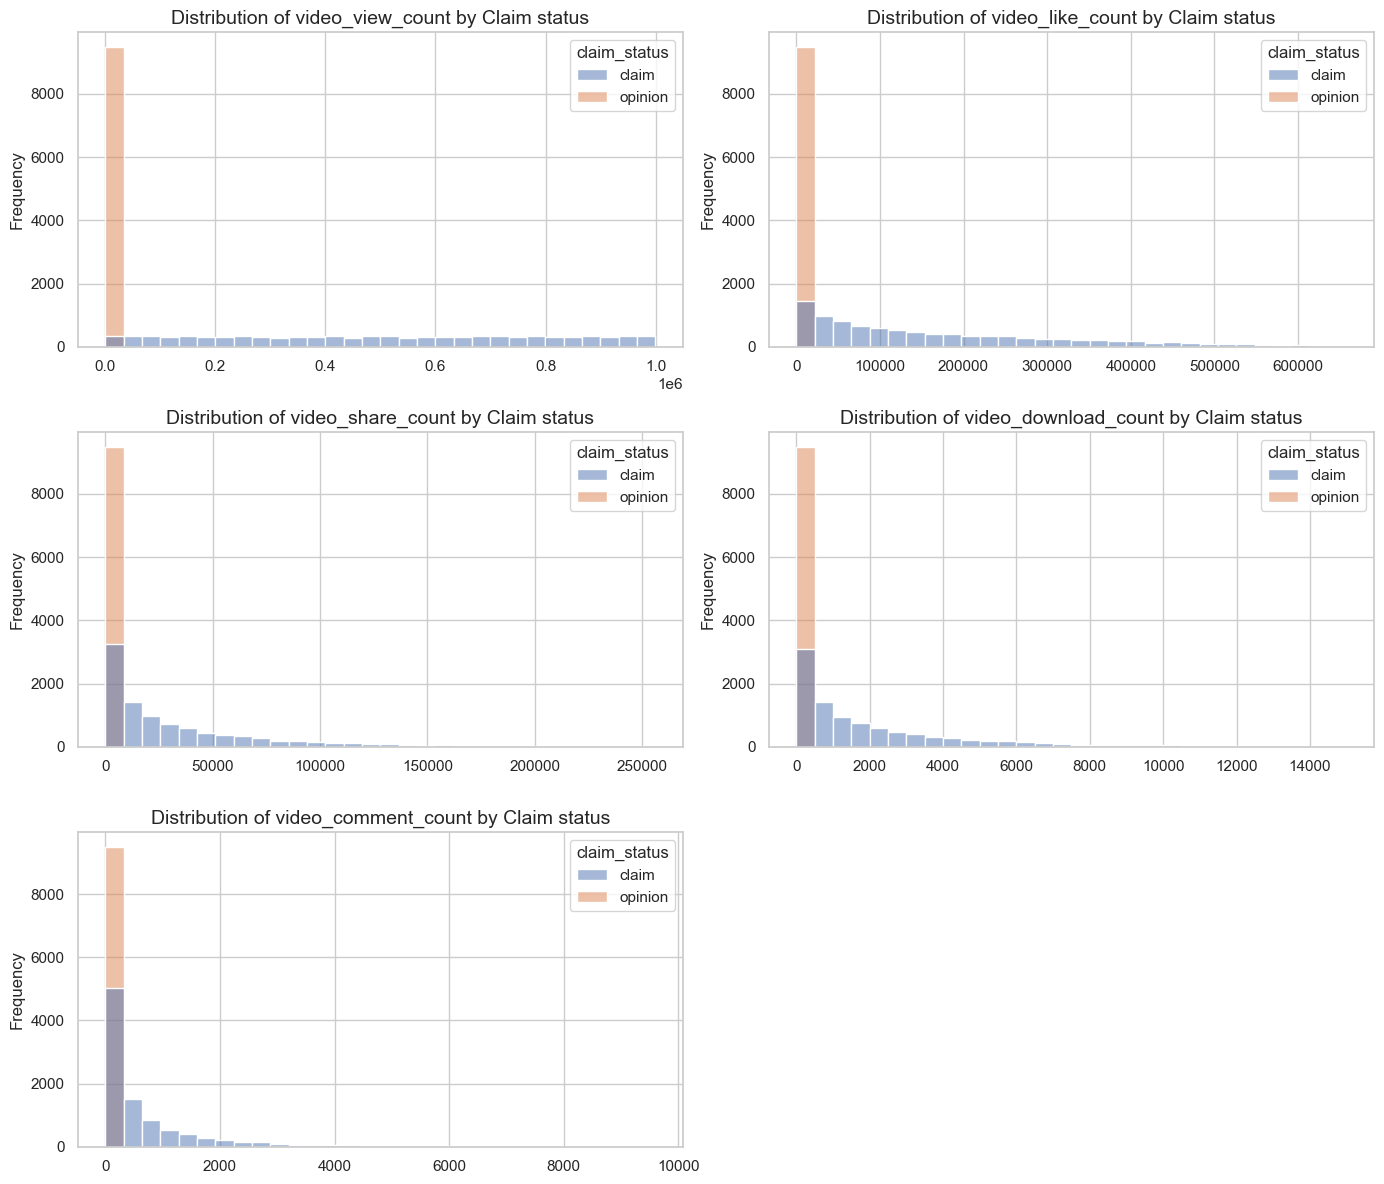

In [37]:
# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")

# Engagement metrics to analyze
engagement_metrics = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

# Plot distributions of engagement metrics
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, metric in enumerate(engagement_metrics):
    sns.histplot(data, x=metric, bins=30, hue='claim_status', ax=axes[i])
    axes[i].set_title(f'Distribution of {metric} by Claim status', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove empty subplot (if any)
if len(engagement_metrics) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

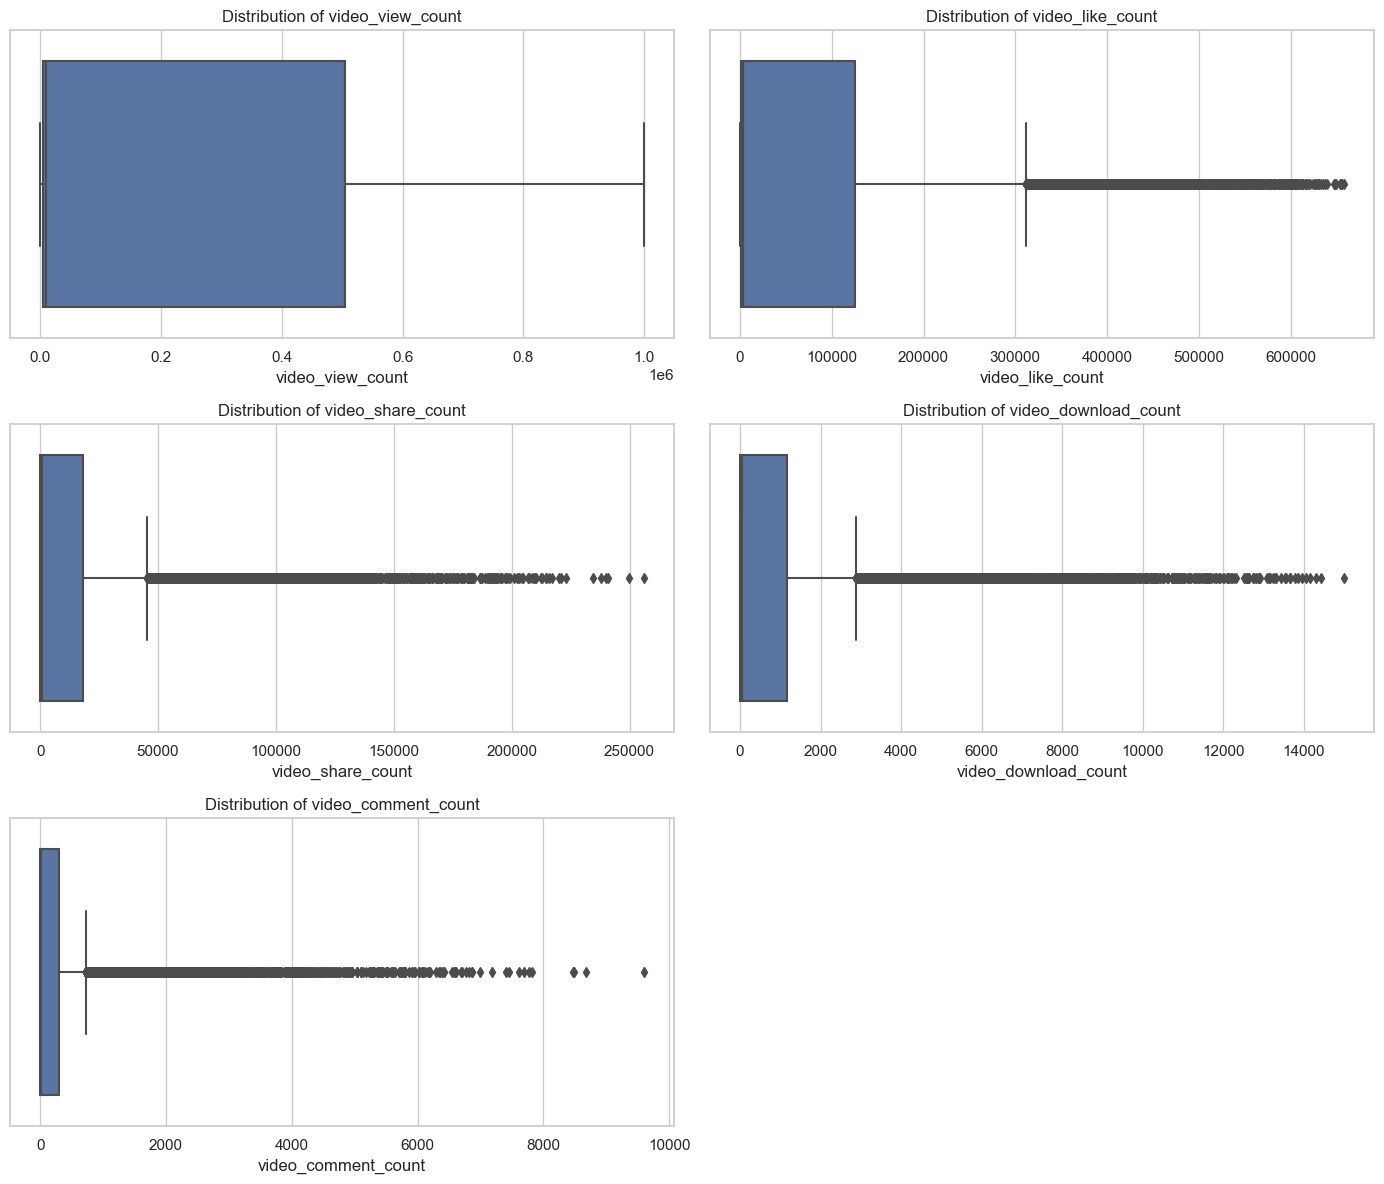

In [27]:
## plotting distrubution of engagement metrics using boxplot

fig, axes = plt.subplots(3,2, figsize=(14,12))
axes = axes.flatten()

## Loop through engagement metrics
for i, metric in enumerate(engagement_metrics):
    sns.boxplot(x = data[metric], ax=axes[i])
    axes[i].set_title(f'Distribution of {metric}')
# Remove empty subplot (if any)
if len(engagement_metrics) % 2 != 0:
    fig.delaxes(axes[-1])
    
plt.tight_layout()
plt.show()

**Skewness:** 

Regardless of claim status, all engagement metrics likely exhibit right-skewed distributions, but the degree of skewness and the range of engagement values might differ across statuses. This indicates that while the general pattern of a few videos achieving very high engagement holds true across claim statuses, the likelihood and scale of achieving high engagement may vary by claim status

**Outliers:**

There are a significant number of outliers present in all engagement metrics, as indicated by the points that lie beyond the whiskers of the boxplots. These outliers represent videos that have performed extraordinarily well compared to the majority, receiving far higher views, likes, shares, downloads, or comments.

**Distribution Insights:**

The engagement metrics are not normally distributed; instead, they are highly concentrated towards the lower end of the scale with a few videos achieving viral status, as reflected by the long tails towards higher values.
This pattern is typical for social media platforms where content visibility and engagement can exponentially increase due to the network effect, but only a small fraction of content achieves such virality.

**Comparative Analysis:**

Without differentiating by claim status in these boxplots, we focus on the overall performance of videos on the platform. However, the variations within these distributions could be further explored by considering claim status or other categorical variables that might influence engagement levels



In [41]:
# define function to add relative percentage of each bar to make it more readable
def add_percent(ax, data, factor = 0):
    """
    Add percentage labels slightly above non-zero bars in a bar chart.

    Parameters:
        ax (matplotlib.axes.Axes): The axis of the bar chart.
        data (list): Data for the bar chart.
        factor (float): The factor by which to raise the label above the bar. Default is 0.
    
    """
    total_count = len(data)
    for i,bar in enumerate(ax.patches):
        height = bar.get_height()
        if height > 0:
            height = height + height*factor
            ax.annotate(f'{(height/total_count)*100:.2f}%',
                   (bar.get_x()+bar.get_width()/2, height),
                   ha = 'center', va = 'bottom',
                   rotation = 45, fontsize = 9)

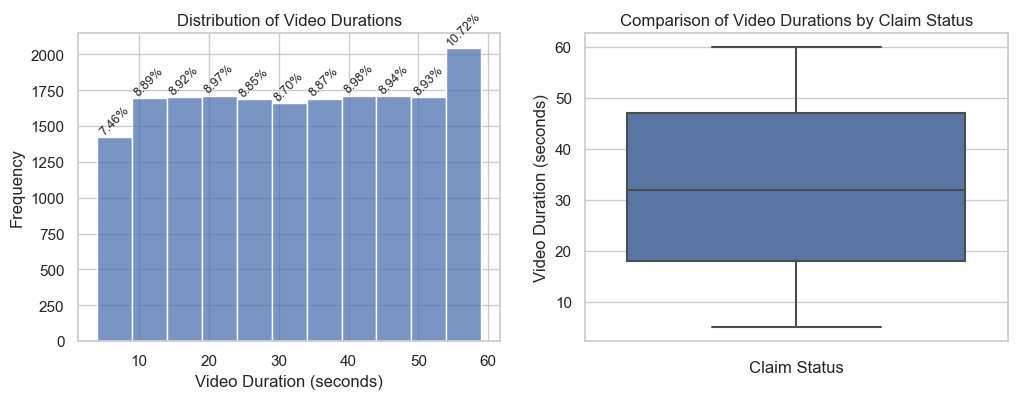

In [59]:
# Creating a boxplot and histogram to visualize distribution of `video_duration_sec`
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

# Histogram
sns.histplot(x=data.video_duration_sec, 
             bins = range(4,61,5),  # Defining bins
             ax=ax1)
ax1.set_title('Distribution of Video Durations')
ax1.set_xlabel('Video Duration (seconds)')
ax1.set_ylabel('Frequency')

# Adding percentage to the histogram
add_percent(ax1, data)

# Boxplot
sns.boxplot(y = data.video_duration_sec, hue=data['claim_status'], ax=ax2)
ax2.set_title('Comparison of Video Durations by Claim Status')
ax2.set_xlabel('Claim Status')
ax2.set_ylabel('Video Duration (seconds)')

plt.show()



The distribution of `video_duration_sec` appears to be roughly uniform, indicating that videos are spread fairly evenly across different duration ranges. Additionally, there are no outliers present in the data, as videos typically cannot exceed 60 seconds in duration. Video durations are the same for claims and opinions

#### **Claim status by verification status**



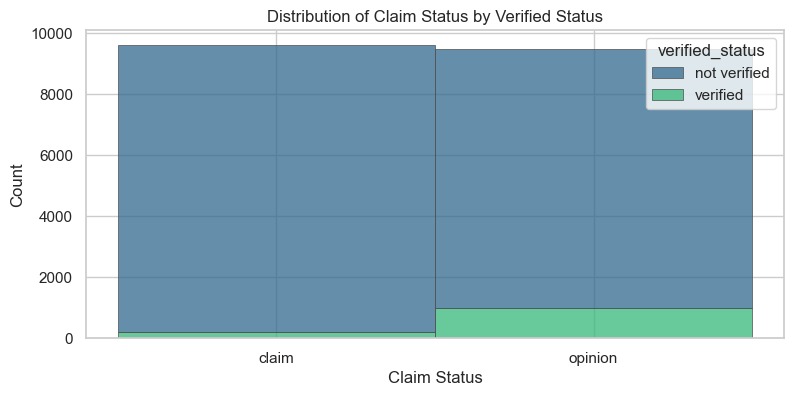

In [60]:
# Create histogram with claim_status on the x-axis and verified_status as hue
plt.figure(figsize=(9,4))
ax = sns.histplot(x=data['claim_status'], 
                  hue=data['verified_status'],
                  multiple="stack",
                  palette="viridis",
                  edgecolor=".3",
                  linewidth=.5,
                  cbar=True)
plt.title('Distribution of Claim Status by Verified Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()


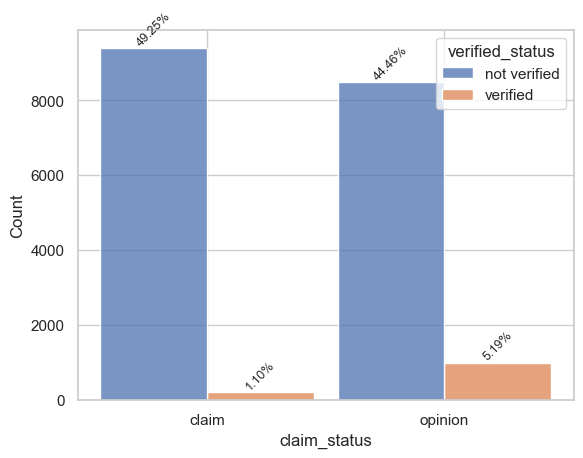

In [42]:
ax = sns.histplot(x=data.claim_status,
                 hue = data.verified_status,
                 multiple = 'dodge',
                 shrink=0.9)
add_percent(ax,data)

We're trying to figure out if we can guess if a video is making a claim or just sharing an opinion. To do this better, we're also looking at whether being verified (like getting a blue checkmark) affects this.

- **Videos Making Claims or Sharing Opinions:** We looked at all the videos and checked if they are trying to make a claim about something or just share an opinion. This helps us know what kind of videos are more common.

- **Verified or Not:** Then, we saw if being verified (which means officially recognized by the platform) makes any difference in whether a video is more likely to be a claim or an opinion.

### Why This Matters for Our Guessing Game

- **Paying Attention to Verification:** It turns out that whether a video is verified or not might help us guess better if it's making a claim or sharing an opinion. So, we should definitely keep an eye on that when we're trying to guess.

This quick look at our videos is just one step in making sure we can guess as accurately as possible whether a video is making a claim or just sharing an opinion.



#### **Claim status by author ban status**
We will employ histogram chart again for this task

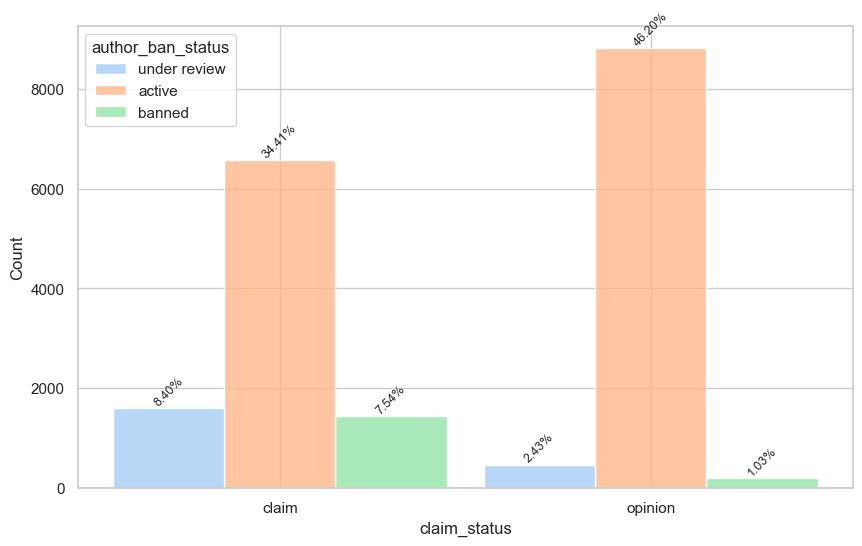

In [44]:
# Create a histogram

plt.figure(figsize=(10,6))
ax = sns.histplot(x= data.claim_status,
                 hue = data.author_ban_status,
                 multiple='dodge',
                 shrink=0.9,
                 palette='pastel')
add_percent(ax,data)



When we look at our videos, we're really interested in two things: whether a video is making a claim or just sharing an opinion, and whether the person who posted the video is in good standing or not (like, if they've been banned before). So, we made this colorful chart to help us see what's going on.

- **Claims vs. Opinions:** We're trying to see if there's a pattern between what kind of video it is (a claim or an opinion) and whether the author has been banned or not.

- **Counting Up:** The height of each colored section shows us how many videos fall into each category. More videos in a category mean a taller bar.

- **Are banned authors making more claims or opinions?** We can quickly see if most of the banned authors tend to make claims or just share their opinions by looking at the size, color and percent value of the bars. `7.54%` percent of claim videos are banned 

- **What about the good-standing authors?** Same thing – we check their bars to understand if they're more about making claims or sharing opinions.

This simple chart helps us get a feel for the behavior of authors on our platform and if being banned has anything to do with the type of videos they post. It's like getting to know our community a bit better, one chart at a time!


#### **Median view counts by ban status**

It's advisable to determine the median values for the `video_view_count` variable based on different author ban statuses. This approach offers a more insightful perspective, especially considering the left-skewed distribution of the data.

In [48]:
# definijng functiion to add numbers to chart
def add_count(ax, data):
    for i, val in enumerate(data):
        formatted_val = f'{val:.0f}'#format the value
        ax.text(i, val, formatted_val, ha ='center', va = 'bottom')

In [49]:
# Grouping the data by author ban status and calculating the median view count for each group
median_ban_status = data.groupby('author_ban_status')[['video_view_count']].median().reset_index()

# Displaying the DataFrame containing the median view counts by ban status
median_ban_status



,author_ban_status,video_view_count
0,active,8616.0
1,banned,448201.0
2,under review,365245.5


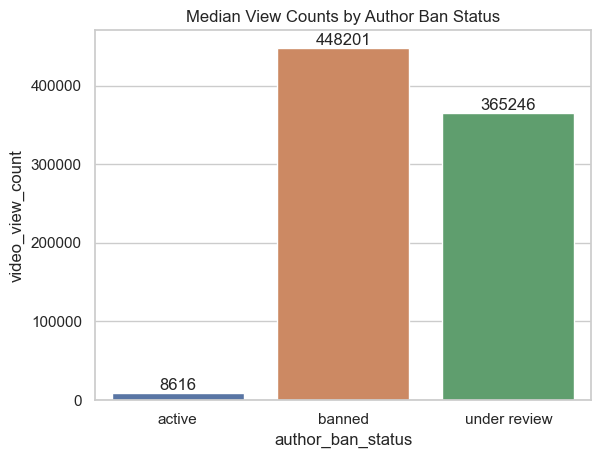

In [50]:
ax = sns.barplot(x = median_ban_status.author_ban_status,
                y = median_ban_status.video_view_count)

# adding labels
add_count(ax,median_ban_status['video_view_count'])

ax.set_title('Median View Counts by Author Ban Status')
plt.show()


We took a closer look at how the status of video authors (like whether they're active, banned, or under review) relates to how many views their videos get. We found something pretty interesting. Videos from authors who are still active and posting tend to get around 8,616 views on average. But, when we look at authors who've been banned, their videos get way more views, about 448,201 on average! And it's similar for authors whose accounts are under review; their videos also get a lot of views, around 365,246 on average.

This makes us think a bit about why this happens. It seems like videos that end up getting their authors banned or put under review are really engaging—they pull in a lot of views. This could be because these videos are controversial or just super interesting to a lot of people. But, there's a catch. While these videos get a lot of attention, they might also be the reason why these authors face issues with the platform.

In simple terms, making videos that get tons of views can sometimes lead to trouble with the platform's rules. This is a tricky balance for video creators. They want to make content that people love and watch a lot, but they also need to make sure they're not breaking any rules. Our look into how many views different authors get shows just how complex this balance can be.



We are going to use same approach for `claim_status` variable

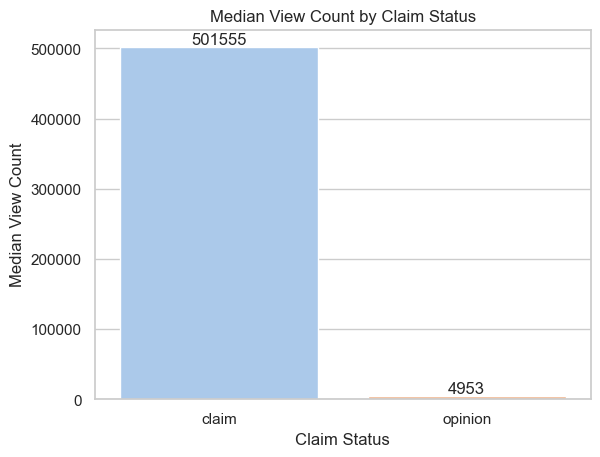

,claim_status,video_view_count
0,claim,501555.0
1,opinion,4953.0


In [51]:
# Calculating the median view count for each claim status
median_claim_status = data.groupby('claim_status')[['video_view_count']].median().reset_index()

# Plotting the bar chart for median view counts by claim status
ax = sns.barplot(x=median_claim_status.claim_status, y=median_claim_status.video_view_count, palette='pastel')

# Adding labels to the bars
add_count(ax, median_claim_status.video_view_count)

ax.set_title("Median View Count by Claim Status")
plt.xlabel('Claim Status')
plt.ylabel('Median View Count')
plt.show()

# Displaying the DataFrame containing the median view counts by claim status for reference
median_claim_status

Videos that are marked as `claim` tend to be watched a lot more, with a median view count of about `501,555` views. That's a huge number! On the other hand, videos labeled as "opinion" don't seem to catch as much attention, having a median view count of just `4,953` views.

So, what does this mean? Well, it seems like videos that make a claim, maybe because they're bold or controversial, end up getting a lot more eyes on them. It could be that these videos spark more curiosity or discussion, leading more people to watch them. On the flip side, opinion videos, which might be more personal or less about stating facts, don't seem to pull in the crowds as much.


#### **Total views by claim status**

Let's visualize the distribution of total views between claim and opinion videos using a pie chart. This chart will showcase the proportions of total views attributed to each video type, providing a clear representation of their respective contributions to overall viewership

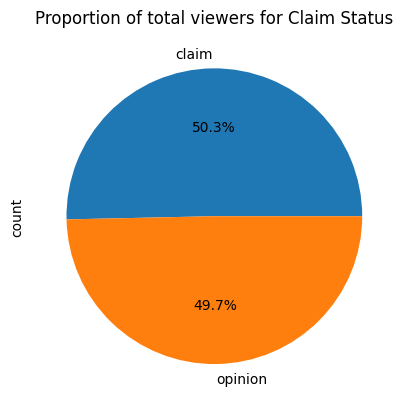

In [85]:
# Plotting the pie chart to show the proportion of total viewers for claim status
data['claim_status'].value_counts().plot.pie(autopct='%1.1f%%')

# adding title
plt.title('Proportion of total viewers for Claim Status')
plt.show()

The pie chart indicates a relatively balanced distribution of video view counts for claim status categories. Approximately 50.3% of the total views are attributed to claim videos, while the remaining 49.7% are associated with opinion videos

### **Determining outliers**

When constructing predictive models, outliers can pose challenges. For instance, extremely high view counts in videos might introduce bias to the model, particularly when predicting the view count of a specific video. Additionally, outliers could indicate issues with data capture or recording methods.

In our TikTok project, the main objective is to develop a model that predicts whether a video falls under the category of claim or opinion. Our analysis has revealed a strong correlation between a video's engagement level and its claim status. While the data aligns with our expectations of social media behavior, where a small fraction of videos garner significant engagement, it's still prudent to assess the presence of outliers.

Determining outliers often involves setting thresholds based on domain expertise and project specifics. In this dataset, the count variables exhibit heavy right-skewness rather than a normal distribution. Hence, instead of relying on quartiles, we can adjust the outlier threshold by calculating the median value for each variable and adding 1.5 times the interquartile range (IQR). This approach yields a threshold that is considerably lower than what it would be if based solely on quartiles.


Now, let's define a function that efficiently calculates the number of outliers for specific columns within a DataFrame. 

In [92]:
def num_outlier(df, column_list, factor=1.5):
    """
    Identify the number of outliers for specific columns in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column_list (list): A list of column names within the DataFrame `df` for which outliers are to be identified.
    - factor (float, optional): An optional parameter representing the multiplier used to calculate the outlier threshold. 
                                Default is 1.5.

    Returns:
    None. Prints the number of outliers for each specified column.
    """
    for col in df[column_list]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        median = df[col].median()
        outlier_threshold = median + factor * iqr
        number_of_outliers = df[col][df[col] > outlier_threshold].count()
        print(f'Number of outliers, {col}: {number_of_outliers}')


In [87]:
col_list =['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
num_outlier(data, col_list)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


### Exploring Likes and Views: Claims vs. Opinions


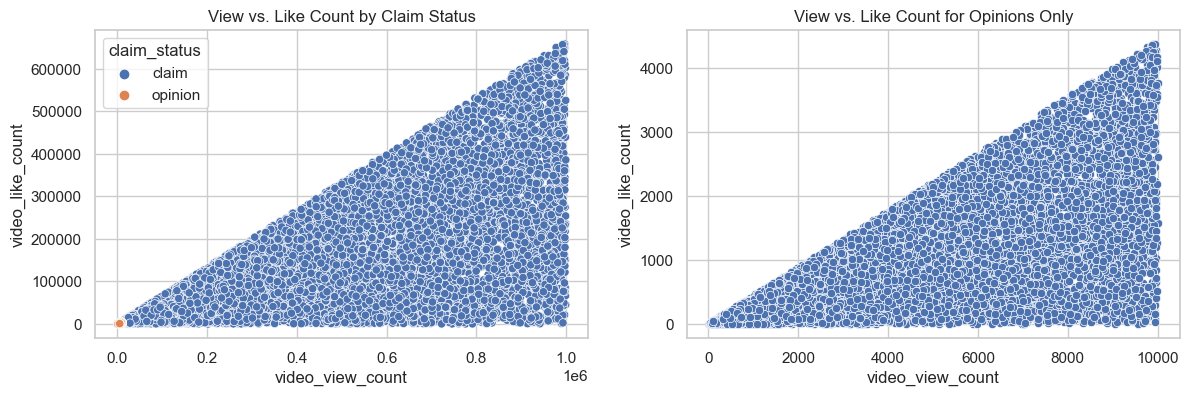

In [54]:
opinion_df = data[data['claim_status'] == 'opinion']

fig, ax = plt.subplots(1,2, figsize=(14,4))
# Creating a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=data.video_view_count, 
                y=data.video_like_count, 
                hue=data.claim_status,
                ax=ax[0])

# Creating a scatterplot of `video_view_count` versus `video_like_count` for opinions only
sns.scatterplot(x=opinion_df.video_view_count, 
                y=opinion_df.video_like_count,
                ax=ax[1])

ax[0].set_title('View vs. Like Count by Claim Status')
ax[1].set_title('View vs. Like Count for Opinions Only')
plt.show()


We drew two special pictures using scatterplot to help us understand more about the videos people watch and like. The first picture shows us all kinds of videos, pointing out which ones are making claims and which ones are just sharing opinions, by using different colors. It's like looking at a crowd and seeing who's wearing hats and who's not. This helps us figure out if the videos making claims are getting more thumbs-ups and eyes than the ones sharing opinions.

Then, we made another picture, but this time we only looked at the videos that share opinions. It's like zooming in with a magnifying glass to see just those videos better, without the claim videos around. This way, we can really see how these opinion videos are doing all by themselves.

What we noticed is pretty interesting. In the big picture with all the videos, it kind of looks like the claim videos might be getting a lot of action—lots of views and lots of likes. And then, when we just look at the opinion videos, we see they also get a good amount of views and likes, but it's a bit different when they're on their own.

So, what we're doing here is trying to see what makes people click and watch a video and then hit that like button. By looking at these pictures, we start to get an idea of what types of videos are really catching people's attention. And looking closely at the opinion videos helps us understand just how much people like them when they're not mixed in with the claim videos.


### Correlation Analysis

Examining the correlations among the engagement metrics can help identify if certain types of engagement are more closely linked than others. Additionally, analyzing how video duration affects these metrics could yield interesting insights into viewer behavior.

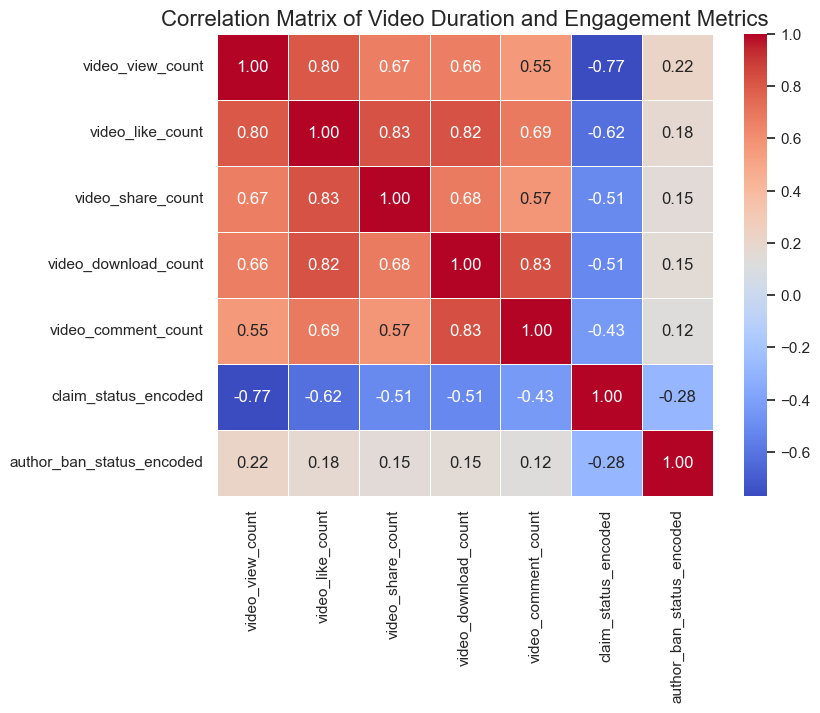

In [61]:
# Before creating a correlation matrix, we need to convert categorical variables into numeric form
# because correlation calculations require numeric values. We'll focus on 'claim_status' and 'author_ban_status' as our main categories
# and convert them into numeric form. Let's use label encoding for 'claim_status' and 'author_ban_status' to keep things simple.

from sklearn.preprocessing import LabelEncoder

# Creating label encoders for each categorical column
le_claim_status = LabelEncoder()
le_author_ban_status = LabelEncoder()

# Encoding the categorical columns
data['claim_status_encoded'] = le_claim_status.fit_transform(data['claim_status'])
data['author_ban_status_encoded'] = le_author_ban_status.fit_transform(data['author_ban_status'])

# Now, let's create a correlation matrix for the dataset, focusing on numerical features and the encoded categorical features
correlation_matrix = data[['video_view_count', 'video_like_count', 'video_share_count',
                           'video_download_count', 'video_comment_count', 'claim_status_encoded', 
                           'author_ban_status_encoded']].corr()

# Displaying the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Video Duration and Engagement Metrics', fontsize=16)
plt.show()



Exploring how videos engage viewers revealed some interesting patterns, especially between the type of content (claims vs. opinions) and how people interact with videos. Here's what stood out:

- **Claim Status vs. Engagement:** Videos labeled as claims tend to engage viewers less across metrics like views, likes, shares, downloads, and comments compared to opinions. This suggests that whether a video is a claim or opinion influences its overall engagement.

- **Engagement Metrics Connection:** All the engagement metrics (views, likes, shares, downloads, comments) are closely linked. A video that gets a lot of views is also likely to get more likes, shares, downloads, and comments. This shows a clear pattern: more engagement in one area often means more engagement in others.


### Evaluation

Our exploratory data analysis (EDA) on the TikTok dataset focused on understanding the dynamics between videos categorized as claims and those marked as opinions, particularly in terms of engagement metrics and the influence of the author's ban status. Here are the refined insights based on our findings:

- **Claims vs. Opinions:** Contrary to initial expectations, our analysis demonstrated that videos labeled as claims typically garner more engagement (views, likes, shares, downloads, and comments) than those labeled as opinions. This suggests that content that makes a claim, possibly due to its assertive nature or the provocation of viewer curiosity and discussion, tends to attract more viewer interaction.

- **Engagement Metrics Correlation:** The EDA highlighted a strong correlation among various engagement metrics, confirming that higher engagement in one area tends to coincide with higher engagement across other metrics as well. This interrelation emphasizes the compounding effect of engagement across the platform.

- **Author Ban Status Insights:** The exploration of author ban status offered a glimpse into the content moderation landscape of TikTok. Although engagement metrics varied, the status of an author (active, banned, or under review) provides a complex layer of context for understanding engagement patterns.

- **Visualization and Accessibility:** Through thoughtful visualizations in both Python and Tableau, we presented our analysis in an accessible and comprehensible manner. It's crucial that these visualizations are designed to be inclusive, ensuring insights are accessible to a broad audience, including those with visual impairments.


### **Conclusion**

Exploratory Data Analysis (EDA) is crucial in the data analysis process as it serves to uncover key insights, trends, and hidden patterns within datasets, enabling a deeper understanding of underlying information. By employing statistical and visual methods, analysts can identify outliers, assess data distribution, and recognize relationships between variables. Initial exploration is pivotal for subsequent analysis decisions, hypothesis formulation, and model selection. Additionally, EDA helps identify missing values and inconsistent data, providing opportunities for data cleaning and preprocessing.

Visualizations play a significant role in understanding the shape and distribution of datasets, identifying outliers, and exploring relationships between variables.
